In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-2008/data.xlsx
/kaggle/input/clickstream-data-for-online-shopping/e-shop clothing 2008.csv


In [15]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.1 MB/s eta 0:00:00a 0:00:010m


In [18]:
import pandas as pd
import numpy as np 
import xlrd
import openpyxl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder


In [20]:
data=pd.read_excel('/kaggle/input/e-commerce-2008/data.xlsx')

In [21]:
df=data
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [22]:
print("Shape of the dataset: ", df.shape)
print("\nMissing values: \t", df.isnull().sum())
print("\nData type of columns: ", df.dtypes)
# print("\nSummary: ", df.describe())


Shape of the dataset:  (165474, 14)

Missing values: 	 year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

Data type of columns:  year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
session ID                  int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
dtype: object


Let's drop year as the data is from 2008 only

In [23]:
df=df.drop(['year'], axis=1)
df=df.dropna()


Product ID or page 2 (clothing model) is a string, let's convert in numeric form

In [24]:
label_encoder = LabelEncoder()
df['page 2 (clothing model)']=label_encoder.fit_transform(df['page 2 (clothing model)'])
df

,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,1,4,1,5,1,28,2,1
1,4,1,2,29,1,1,7,1,6,1,33,2,1
2,4,1,3,29,1,2,70,10,2,1,52,1,1
3,4,1,4,29,1,2,51,6,6,2,38,2,1
4,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,8,13,2,34,24026,3,87,12,1,1,43,1,1


# Co-relation Matrix

1. There high positive correlation between session ID and month
2. Page 1 and Page 2 also show a significant relation
3. There a good relation between model photography and page, meaning there might be certain pages with certain kind of poses
4. page 1 and page 2 are related to other columns like order and country indicating 


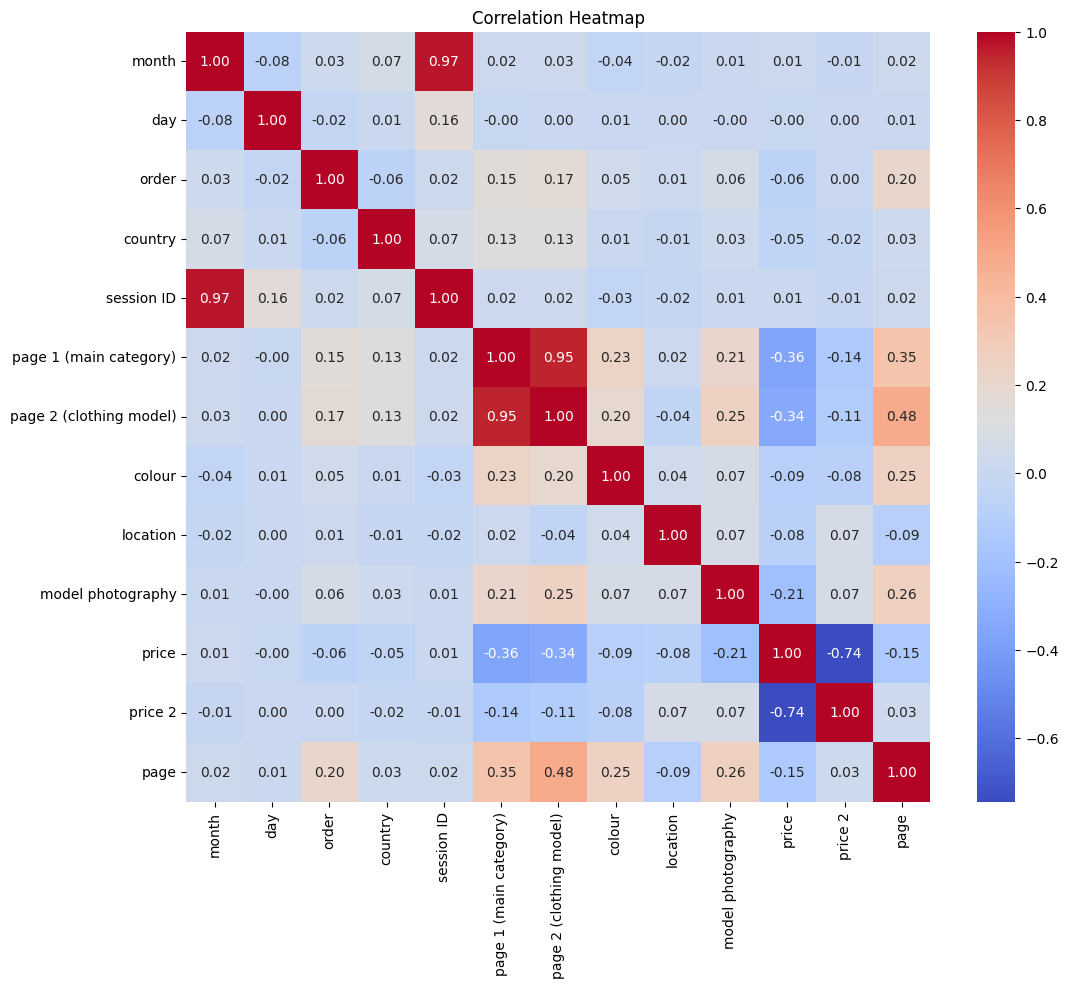

In [25]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Sales by Month
1. How do the sales vary with respect to month?
2. Which month has highet sales?
3. Are there any patterns?

In [26]:
sales_by_month = df.groupby('month')['price'].sum()

# Plotting the bar graph
bar_fig = go.Figure([go.Bar(x=sales_by_month.index, y=sales_by_month.values)])
bar_fig.update_layout(title='Sales by Month (Bar Graph)', xaxis_title='Month', yaxis_title='Total Sales')

# Plotting the pie chart
pie_fig = go.Figure([go.Pie(labels=sales_by_month.index, values=sales_by_month.values)])
pie_fig.update_layout(title='Sales by Month (Pie Chart)')

# Show both plots
bar_fig.show()
pie_fig.show()

# Insights
1. April has recorded highest number of sales
2. We see a dip in the sales afterwards, but for the month of May - June - July the sales are almost same 
3. Finally in August we see a major dip in the sales, which on further observation was found that the dataset doesn't contain any dates after 13th August

In [27]:
day_wise_sales = df.groupby(['month', 'day'])['price'].sum()
day_wise_sales

month  day
4      1      139570
       2      150387
       3       81466
       4       78843
       5       66579
               ...  
8      9       47262
       10      40799
       11      54065
       12      60768
       13       8560
Name: price, Length: 135, dtype: int64

In [28]:
def get_day_of_week(month, day):
    date_str = f'2008-{month:02d}-{day:02d}'  # Concatenate year, month, and day
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')  # Convert string to datetime object
    return date_obj.strftime('%A')  # Return the full name of the day
df['which_day']=df.apply(lambda row: get_day_of_week(row['month'], row['day']), axis=1)
df

,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,which_day
0,4,1,1,29,1,1,4,1,5,1,28,2,1,Tuesday
1,4,1,2,29,1,1,7,1,6,1,33,2,1,Tuesday
2,4,1,3,29,1,2,70,10,2,1,52,1,1,Tuesday
3,4,1,4,29,1,2,51,6,6,2,38,2,1,Tuesday
4,4,1,5,29,1,2,74,4,3,2,52,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,24024,2,44,2,4,1,67,1,1,Wednesday
165470,8,13,1,9,24025,1,2,3,4,1,62,1,1,Wednesday
165471,8,13,1,34,24026,1,11,3,1,1,43,2,1,Wednesday
165472,8,13,2,34,24026,3,87,12,1,1,43,1,1,Wednesday


In [29]:
day_wise_sales = df.groupby(['month', 'day', 'which_day'])['price'].sum().reset_index()

# Define colors for different days of the week
color_dict = {'Saturday': 'orange', 'Sunday': 'orange', 'Monday': 'green', 'Tuesday': 'green',
              'Wednesday': 'green', 'Thursday': 'green', 'Friday': 'green'}

# Plot day-wise sales for each month
for month in [4, 5, 6, 7, 8]:
    month_data = day_wise_sales[day_wise_sales['month'] == month]
    
    fig = go.Figure()
    for day, data in month_data.groupby('which_day'):
        color = color_dict[day]
        fig.add_trace(go.Bar(x=data['day'], y=data['price'], name=day, marker_color=color))
    
    fig.update_layout(title=f'Day-wise Sales for Month {month}',
                      xaxis_title='Date', yaxis_title='Total Sales')
    fig.show()

# Hence, I propose the "Weekend Theory"
* Now we know that April witnessed highest sales, but this insight won't generate plenty of leads.
* What can a brand conclude from this? That they should be prepared to manufacture and advertise more in April... But that's rather a vague insight
* We need to dive deeper to find a pain point in the sales figures
* Now if we plot a day-wise graph of total sales and observe, we see that Weekends record a massive dip in sales. 
* That is not surprising if you try to rationalise the insight. It simply means people on workdays can't actually travel to a store and shop their products which they can do on weekends!

## *So here's a tip for sellers - **AVOID ADVERTISING ON WEEKENDS!** people like to enjoy their holidays in different ways but definetly not buying from e-commere website*

# Country Wise Analysis
### Let's answer these questions
* What country contributes the most to overall sales?
* What are the sales country wise?
* The pattern we observed for weekdays, does it apply to all the countries?
* Are there specific countries that are inclined towards above avergae price/below average price of the products? 

In [30]:
total_sales_by_country = df.groupby('country')['price'].sum().reset_index()
top_5_countries = total_sales_by_country.sort_values(by='price', ascending=False).head(5)
print("The total sales for each country are: \n",total_sales_by_country)
# Plot the graph using Plotly
fig = px.bar(top_5_countries, x='country', y='price',
             title='Total Sales by Country',
             labels={'Country': 'Country', 'price': 'Total Sales'})

fig.show()

The total sales for each country are: 
     country    price
0         1      104
1         2     2460
2         3    10330
3         4       38
4         5      166
5         6      229
6         7      370
7         8       23
8         9   826722
9        10     7134
10       11     5116
11       12     9240
12       13       86
13       14     2169
14       15     5491
15       16    36968
16       17     1075
17       18      673
18       19     1098
19       20      403
20       21    34753
21       22     6815
22       23     2166
23       24   179725
24       25     2804
25       26      114
26       27     9935
27       28     6266
28       29  5823451
29       30      160
30       31     6595
31       32     2107
32       33       99
33       34    32732
34       35       99
35       36      875
36       37     6483
37       38     6307
38       39     1673
39       40       33
40       41    30012
41       42     7753
42       43     1370
43       44    61680
44       45    

### We have a clear winner, 29th country which is THE ONE MAN ARMY for total sales.
*However, is that the full picture? what about the average?*

In [31]:
asc1=df.groupby('country')[['price']].sum()
asc2=df.groupby('country')[['price']].count()
asc1['average']=asc1/asc2
print(asc1)
fig = px.bar(asc1, x=asc1.index, y='average', color='price', color_continuous_scale='agsunset', title='Average sales by country')
fig.show()

           price    average
country                    
1            104  34.666667
2           2460  42.413793
3          10330  40.351562
4             38  38.000000
5            166  41.500000
6            229  45.800000
7            370  41.111111
8             23  23.000000
9         826722  45.921346
10          7134  46.934211
11          5116  44.486957
12          9240  44.000000
13            86  43.000000
14          2169  50.441860
15          5491  43.928000
16         36968  44.326139
17          1075  46.739130
18           673  37.388889
19          1098  37.862069
20           403  40.300000
21         34753  42.852035
22          6815  47.326389
23          2166  47.086957
24        179725  43.931802
25          2804  39.492958
26           114  57.000000
27          9935  43.766520
28          6266  45.079137
29       5823451  43.470593
30           160  32.000000
31          6595  45.798611
32          2107  43.000000
33            99  33.000000
34         32732  45

### Okay, the 29th country doesn't have a good average!
#### However, The its **volume of sales** is significantly larger!!!*
* *By selling and advertising in country=26 that has the best average, Seller will be able to sell very less products although with good profits but on the other hand with a little less average 29th country sells in millions*
* *Earning more with less profit is better than earning very very less with good profits.*

In [32]:
fig = px.pie(top_5_countries, names='country', values='price', title='Top 5 Countries by Total Sales')
fig.show()

### Now let's check monthwise, from now on we'll consider top 5 countries only as they contribute the most to sales and with a very high margin

In [33]:
total_sales_by_country_month = df.groupby(['country', 'month'])['price'].sum().reset_index()
# print(total_sales_by_country_month)
top_5_countries = total_sales_by_country.sort_values(by='price', ascending=False).head(5)['country']
top_5_countries_data = total_sales_by_country_month[total_sales_by_country_month['country'].isin(top_5_countries)]
# print(top_5_countries_data)
sales_pivot = top_5_countries_data.pivot(index='country', columns='month', values='price')
print(sales_pivot)
fig = px.imshow(sales_pivot, labels=dict(x="month", y="country", color="Total Sales"),
                 x=['April', 'May', 'June', 'July', 'August'],
                 y=sales_pivot.index,
                 title='Total Sales by Country and Month',
                 color_continuous_scale='agsunset')
fig.show()

month          4        5        6        7       8
country                                            
9         260716   236209   175074   112614   42109
24         61486    21691    56217    35343    4988
29       1667355  1213755  1089819  1311085  541437
44         14854    13183    15992    15936    1715
46         31213    22591    22667    25507   11742


### The inital pattern is evident in every country too, i.e. April saw a very high sales with subsequent months having declining sales, The data incompleteness of August is also evident

In [34]:
total_sales_by_country_day = df.groupby(['country', 'which_day'])['price'].sum().reset_index()
# print(total_sales_by_country_day)
total_sales_by_country = total_sales_by_country_day.groupby('country')['price'].sum().reset_index()
# print(total_sales_by_country)
# Sort the DataFrame by total sales in descending order and select top 5 countries
top_5_countries = total_sales_by_country.sort_values(by='price', ascending=False).head(5)['country']
top_5_countries_data = total_sales_by_country_day[total_sales_by_country_day['country'].isin(top_5_countries)]

# Pivot the data to create a table
sales_pivot = top_5_countries_data.pivot(index='country', columns='which_day', values='price')

# Plot the heatmap using Plotly
fig = px.imshow(sales_pivot, labels=dict(x="Day", y="Country", color="Total Sales"),
                 x=sales_pivot.columns,
                 y=sales_pivot.index,
                 title='Total Sales by Country and Day',
                 color_continuous_scale='agsunset')
fig.show()


### This proves that our "weekend effect" theory is rock solid 

In [35]:
total_sales_by_country_day = df.groupby(['country', 'which_day'])['price'].sum().reset_index()
print(total_sales_by_country_day)
total_sales_by_country = total_sales_by_country_day.groupby('country')['price'].sum().reset_index()
top_5_countries = total_sales_by_country.sort_values(by='price', ascending=False).head(5)['country']

top_5_countries_data = total_sales_by_country_day[total_sales_by_country_day['country'].isin(top_5_countries)]

merged_data = pd.merge(top_5_countries_data, total_sales_by_country, on='country', suffixes=('_day', '_total'))
merged_data['percentage'] = (merged_data['price_day'] / merged_data['price_total']) * 100

sales_pivot = merged_data.pivot(index='country', columns='which_day', values='percentage')

fig = px.imshow(sales_pivot, labels=dict(x="day", y="country", color="Percentage of Total Sales"),
                 x=sales_pivot.columns,
                 y=sales_pivot.index,
                 title='Percentage of Total Sales by Country and Day',
                 color_continuous_scale='agsunset')
fig.show()


     country  which_day  price
0          1  Wednesday    104
1          2     Monday    234
2          2   Thursday    598
3          2    Tuesday    888
4          2  Wednesday    740
..       ...        ...    ...
193       46    Tuesday  23575
194       46  Wednesday  17926
195       47   Saturday    119
196       47     Sunday     48
197       47  Wednesday    133

[198 rows x 3 columns]


In [36]:
print(df['price 2'].unique())
df2=df
# Ensure 'Price 2' column is of string type
df2['price 2'] = df['price 2'].astype(str)

# Group by country and count occurrences of '1' and '2' in 'Price 2' column
price2_counts_by_country = df2.groupby('country')['price 2'].value_counts().unstack(fill_value=0)

# Plot the graph
fig = go.Figure(data=[
    go.Bar(name='Below Average Price', x=price2_counts_by_country.index, y=price2_counts_by_country['1']),
    go.Bar(name='Above Average Price', x=price2_counts_by_country.index, y=price2_counts_by_country['2'])
])

# Update layout
fig.update_layout(barmode='group', title='Count of Price Categories (1 and 2) by Country', xaxis_title='Country', yaxis_title='Count')

# Show the plot
fig.show()


[2 1]


In [37]:
top_5_countries = df.groupby('country')['price'].sum().nlargest(5).index

df_top_5 = df[df['country'].isin(top_5_countries)]
df_top_5['price 2'] = df_top_5['price 2'].astype(str)

price2_counts_by_country = df_top_5.groupby('country')['price 2'].value_counts().unstack(fill_value=0)

fig = go.Figure(data=[
    go.Bar(name='Below Average Price', x=price2_counts_by_country.index, y=price2_counts_by_country['1']),
    go.Bar(name='Above Average Price', x=price2_counts_by_country.index, y=price2_counts_by_country['2'])
])

fig.update_layout(barmode='group', title='Count of Price Categories (1 and 2) by Top 5 Countries', xaxis_title='Country', yaxis_title='Count')

fig.show()

/tmp/ipykernel_33/2840482642.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Conclusions from the Country Analysis 
1. The 29th country is the major contributor of sales, and it is major contributor by a very huge margin. 
2. It alone contributes for 83.1% of total sales followed by the country 11.8% making other countries highly insignificant 
3. Yes, the weekend-"I am gonna go shopping" thing is also relevant for the top 5 countries. 
4. Now there isn't a huge margin between the products sold that had higher than average price and lower than average price, So product is likely to sold if it were to get sold, it won't rely much on relation of its price with average. 



# Categorical EDA

In [38]:
category_sales = df.groupby('page 1 (main category)')['price'].sum().reset_index()

print(category_sales)

fig1 = px.bar(category_sales, x='page 1 (main category)', y='price',
             title='Total Sales by Main Category',
             labels={'Page 1 (Main Category)': 'Main Category', 'price': 'Total Sales'})
fig = px.pie(category_sales, values='price', names='page 1 (main category)', title='Pie Chart')
fig1.show()
fig.show()

   page 1 (main category)    price
0                       1  2323692
1                       2  1966199
2                       3  1554334
3                       4  1403951


### Although with not a very significant margin but product with category=1 has generated the highest sales, but is it the most profitable?
*Let's find out*
*Here we have no proper structured cost price, sell price, operation cost etc. but by profit we mean that which product generates more money eventhough less number of it were sold, rather we can say which product is more valued*

In [39]:
category_stats = df.groupby('page 1 (main category)').agg({'price': ['count', 'sum']}).reset_index()
category_stats.columns = ['type', 'occurrences', 'sales']
category_stats['Value'] = category_stats['sales'] / category_stats['occurrences']

print(category_stats)

   type  occurrences    sales      Value
0     1        49742  2323692  46.714889
1     2        38408  1966199  51.192434
2     3        38577  1554334  40.291728
3     4        38747  1403951  36.233799


In [40]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=category_stats['type'], y=category_stats['Value'], name='Value'))
fig2.update_layout(barmode='group', title='Value by Category', xaxis_title='Category Type', yaxis_title='Value')


fig2.show()


# Insights
1. The above graph can be usefull for adveritsing in correspondance to supply chain management. 
2. When there is abundance of each and every product, advertising for all the products with slightly more advertisements related to product 1 and 2 would work fine.
3. However, if there is shortage in production or in demand of these products.. Seller should focus on advertising more on product 2 as it will help generate more sales for same number of products sold as compared to other ones.
4. The most popular product would still be product-1. For a good manufacturing to generate best leads via advertisement would have to be a trade-off between amount of advertising efforts for product 1 and 2. As product-1 is more likely to get sold and product-2 is more likely to generate higher revenue 

In [41]:
daily_sales = df.groupby(['which_day', 'page 1 (main category)'])['price'].sum().reset_index()
monthly_sales = df.groupby(['month', 'page 1 (main category)'])['price'].sum().reset_index()

print(daily_sales)
print(monthly_sales)

    which_day  page 1 (main category)   price
0      Friday                       1  318036
1      Friday                       2  261530
2      Friday                       3  209051
3      Friday                       4  204068
4      Monday                       1  372528
5      Monday                       2  303596
6      Monday                       3  231289
7      Monday                       4  204147
8    Saturday                       1  231897
9    Saturday                       2  191387
10   Saturday                       3  163242
11   Saturday                       4  147430
12     Sunday                       1  256346
13     Sunday                       2  227891
14     Sunday                       3  179289
15     Sunday                       4  158267
16   Thursday                       1  360365
17   Thursday                       2  307092
18   Thursday                       3  225761
19   Thursday                       4  217302
20    Tuesday                     

In [42]:
fig_monthly = px.bar(monthly_sales, x='month', y='price', color='page 1 (main category)',
                      title='Monthly Sales Analysis by Category', color_continuous_scale='agsunset')
fig_monthly.show()

In [43]:
fig_daily = px.bar(daily_sales, x='which_day', y='price', color='page 1 (main category)',
                    title='Daily Sales Analysis by Category', color_continuous_scale='agsunset')
fig_daily.show()

# Insights 
1. Notice how our inital conclusions hold true from different perspectives. 
2.  Product 1 & 2 are the highest contributor for almost all the months and days
3. Notice the dip in saturday and sunday.

# Let's post mortem Order


In [44]:
os1=df.groupby('order')[['price']].sum()
os1=os1.sort_values(['order'], ascending=False)
os2=df.groupby('order')[['price']].count()
os2=os2.sort_values(['order'], ascending=False)

order_sales=os1
order_sales['average']=os1/os2
order_sales=order_sales.sort_values(['average'], ascending=False).head(100)

print(order_sales)
fig = px.scatter(order_sales, x=order_sales.index, y='price', title='Relationship between Order and Total Sales',
                 labels={'order': 'Order (Number of Clicks)', 'price': 'Price (Total Sales)'},
                 size='average', 
                 color='price',  
                 color_continuous_scale='agsunset',
                 hover_name='price')  
fig.show()

       price    average
order                  
153      235  58.750000
173      168  56.000000
154      224  56.000000
156      220  55.000000
149      220  55.000000
...      ...        ...
50      5905  41.879433
51      5693  41.860294
75      1715  41.829268
30     27803  41.809023
27     34980  41.792115

[100 rows x 2 columns]


# Insights 
1. The sales are highest for lower number of clicks, while it declines exponentially as the number of clicks increase
2. This is an indicator that the user is not able to find a product that he want and gets huge order value which denotes him/her surfing through website
3. Ease of finding product on the website hence is very important factor. Seller might have the product the customer is looking for but if not served readily, it will be of no use

In [45]:
country_stats = df.groupby('country').agg({'order': 'mean', 'price': 'sum'}).reset_index()

# Define a custom color scale
colors = ['#FF5733', '#FF764B', '#FF9764', '#FFB97C', '#FFD594', '#FFEEAD',
          '#FFFFC5', '#E3F6D5', '#C7EDDF', '#ABE4E9', '#8FDBF3', '#72D2FD', 
          '#55C9FF', '#38C0FF', '#1BB7FF', '#00AEFF', '#00A1F0', '#0094E1',
          '#0087D1', '#007AB2', '#006D93', '#006175', '#005456', '#004737']

# Plot the relationship between country and average order using Plotly
fig = px.bar(country_stats, x='country', y='order', title='Average Number of Clicks by Country',
             labels={'country': 'Country', 'order': 'Average Order'},
             hover_name='order',  # Show average order on hover
             color='price',  # Set marker color based on total sales
             color_continuous_scale=colors)  # Choose custom color scale
fig.show()

In [46]:
df11 = df.groupby('country')[['order']].sum()
df11 = df11.sort_values(['order'], ascending=False)

df22 = df.groupby('country')[['order']].count()
df22 = df22.sort_values(['order'], ascending=False)

df11['avreage_clicks'] = df11/df22
df11 = df11.sort_values(['avreage_clicks'], ascending=False)
df11 = df11.query("avreage_clicks > 3 ")

fig = px.scatter(df11, x=df11.index, y="avreage_clicks",
                 size="avreage_clicks", color=df11.index, size_max=60, color_continuous_scale='agsunset')
fig.show()

# Okay, they were Frustrated
1. First we found that Higher the value of order, lower the sales.
2. Order is basically sequence of clicks, which means indirectly means that for how long is the user interacting with the webpage.
3. Lower corresponding to higher order value only means that the user is more likely to buy the products if he/she doesn't have to surf a lot searching for that product. 
4. We can see that counties with good sales also have a decent and respectable order values.


# Colour Colour, kayo Colour?
1. Is there any specific colour that sells better?
2. Is a certain color price higher or lower?
3. How are model photography and colour related?

In [47]:
cdf=df.groupby('colour')['price'].sum().reset_index()

fig = px.bar(cdf, x=cdf.index, y='price', title='Sales by colors', color='price', color_continuous_scale='agsunset')
fig.show()

In the below cell, go to the colour number and corresponding to it go to the page number, you will find the total sales in the hierarchy you are.

In [48]:
color_page_analysis = df.groupby(['colour', 'page']).agg({'price': ['sum', 'mean']})
color_page_analysis.columns = ['Total Sales', 'Average Sales']

print(color_page_analysis)



             Total Sales  Average Sales
colour page                            
1      1          130280      34.239159
       2          165291      47.868810
       4           14756      28.000000
2      1          827567      47.841774
       2          399508      45.621560
       3          127003      50.801200
       4           37013      35.726834
       5            7457      43.104046
3      1         1401252      49.286061
       2           40644      49.086957
4      1          459111      40.181253
       2           88249      44.525227
       3           95755      36.052334
       4           10793      43.000000
       5            8686      43.000000
5      2           12507      33.000000
       4           51738      40.169255
6      1          172526      36.770247
       2          296219      42.584675
       3          116855      34.716280
       4           88540      50.972942
       5           34800      48.000000
7      1           78936      33.000000


# Does the location matter?

Let's see where the products are displayed has anything to do with color or not
1. Top Left
1. Top Center
1. Top Right
1. Bottom Left
1. Bottom Center
1. Bottom Right

In [49]:
dfcp = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(dfcp, x="location", y="counts", color='colour', size='counts', size_max=60)
fig.show()

# Insights
1. Honestly, no insights
2. We may find conclusions that such kind of products are placed here etc. but it is not a significant factor contributing to sales

# Category and its Purchasing pattern

In [50]:
category_counts = df.groupby('page 1 (main category)')['price 2'].value_counts().unstack(fill_value=0)

figcp = go.Figure()

for col in category_counts.columns:
    figcp.add_trace(go.Bar(x=category_counts.index, y=category_counts[col], name=f'Price {col}'))

figcp.update_layout(barmode='stack', xaxis_title='Category', yaxis_title='Count', title='Count of 1 and 2 from "price 2" for each category')
figcp.show()

# Insights 
1. Product of category 1 is sold more when the price was expensive.
2. However its the converse for category 2, 3 and 4. 

# What's in face?

In [51]:
df5 = df.groupby(by=["model photography", 'page 1 (main category)'])['price'].count().reset_index(name="counts")
px.bar(data_frame=df5, x="model photography", y="counts", color="page 1 (main category)", barmode="group", color_continuous_scale='agsunset')

# Insights
1. People get attracted to products that are displayed with a model's face in them. 
2. Ideally we might think that people don't give much importance to such factors but have a look at the difference in the total sales. 

# The Final insight
1. What are the sales corresponding to the page number?
2. What can we conclude?

In [52]:
dfp = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(dfp, x="page", y="counts", color="page 1 (main category)", barmode="group", color_continuous_scale='agsunset')

# Insight
1. As we can see very clearly that products on page 1 almost all the categories are performing very well, indicating that this might be a landing page or home page?
2. The second page still shows a decent share in sales. 
3. Sales decline as we move deeper into pages, why would that be?
4. There is just one particular category that is places on the 5th page! 

We can't sit and manually select and filter this that what product should be placed where... Also we can't just flood everything on the first page as we would have restrictions. We can possibly train a model for this.
On basis of product features and other external factors like date etc. let's train a model that helps us designing the solution to this. 

The model is trained and uploaded on Kaggle. 
Here's the link to access the model, I have set the access to public... 


# The Ultimate Sales Guideline 

1. Don't advertise on weekends, focus on other parts of operations, conduct meetings, analyse reports, take a break but don't spend extra bucks advertising on weekends as there is a severe dip in the sales on weekends. Start targeting ads from Monday onwards and stop before Friday ends, this will prevent a lot of cash burn. 

2. Use Color (2 & 3) products to attract customers.

3. Make sure that these products have a face (face of the model on the display)

4. Use my Algorithm, (the link is given in the next markdown) to deign your page. The model is trained with an accuracy of 99.4% and it know that what kind of products should go to which page

5. Focus on the 29th country and other subsequent top 5 countries. They earn you 94% of your total. It is possible that for the rest 40 countries you are burning a lot of cash but aren't able to generate equivalent revenue. 

6. Order value is very very important. More the order value gets, more confused and frustrated the customer will get. The Page algorithm ideally will solve this problem too, as we would design the page in such a way that model has already learned which product should go where and hence optimising the sequence of clikcs. 

7. If you are the seller and manufacturer for product of cateogry 1, go for higher profit margins and higher prices as the popularity of the product is such that it will still get sold more than cheaper priced products.


# Notebook link 👇
[Click Here](https://www.kaggle.com/code/ddevvedd/model-hyperlab)